# Compilacion de metnum.cpp

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: no se puede crear el directorio «build»: El fichero ya existe
-- The C compiler identification is GNU 10.2.0
-- The CXX compiler identification is GNU 10.2.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/duerunner/Documents/MetNum/tp2/tp2/bin/python (found version "3.6.12") 
-- Found PythonLibs: /usr/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/duerunner/Documents/MetNum/tp2
-- Configuring done
-- Generating done
-- Build files have been written to: /home/duerunner/Documents/MetNu

In [1]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/duerunner/Documents/MetNum/tp2/notebooks
Python 3.6.12


## Explorando los datos

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

Es un csv, con columnas por cada pixel

In [3]:
df_train[:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reducir el dataset
Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO

In [4]:
#df_train = df_train[:2000]

En el primer caracter está el dígito a reconocer. Llamamos a esto y_train

In [5]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((42000, 784), (42000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 7


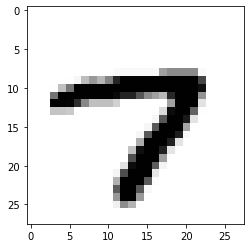

In [6]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")

### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [7]:
df_train["label"].value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [8]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 33600 instancias de entrenamiento y 8400 de validación


In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = metnum.KNNClassifier(100)
#clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)

In [ ]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

# Experimento 1
### Análisis de k para kNN

In [10]:
%%time
from sklearn.metrics import accuracy_score, precision_score
from time import time
import numpy as np

total_accuracies = []
total_precisions = []
total_knnTimes = []

# Los k que voy a probar están entre 0 y 49
k_list = np.arange(1,20)

for k in k_list:
    # Tomo el tiempo antes de iniciar la ejecución del algoritmo knn
    knnTime_start = time()
    
    # Ejecuto el algoritmo de metnum.cpp
    metNumClassifier = metnum.KNNClassifier(k)
    metNumClassifier.fit(X_train, y_train)
    y_pred = metNumClassifier.predict(X_val)
    
    # Tomo el tiempo al finalizar la ejecución del algoritmo y voy guardando los resultados
    knnTime_end = time()
    knnTime = knnTime_end - knnTime_start
    
    # Uso las metricas de sklearn para calcular el accuracy y la precisión
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    
    print(f"Accuracy number {k} is {accuracy}")
    print(f"Precision number {k} is {precision}")
    print(f"knnTime number {k} is {knnTime}")
    
    # Voy guardando los resultados parciales en las listas correspondientes
    total_knnTimes.append(knnTime)
    total_accuracies.append(accuracy)
    total_precisions.append(precision)
    
print("TERMINADO!")

columnas = ["k", "accuracy", "precision", "time"]
join_cols = np.column_stack((k_list, total_accuracies, total_precisions, total_knnTimes))

resultado = pd.DataFrame(join_cols, columns=columnas)
resultado.to_csv(F"Exp1/resultado_exp1_kNN.csv", index=False, header=True);
plt.show()

Accuracy number 1 is 0.93
Precision number 1 is 0.9304337060837575
knnTime number 1 is 14.15400505065918
Accuracy number 2 is 0.93
Precision number 2 is 0.9304337060837575
knnTime number 2 is 11.846100091934204
Accuracy number 3 is 0.932
Precision number 3 is 0.9327913090828506
knnTime number 3 is 13.887491226196289
Accuracy number 4 is 0.93
Precision number 4 is 0.9316454720821217
knnTime number 4 is 12.628970861434937
Accuracy number 5 is 0.933
Precision number 5 is 0.9347957865330251
knnTime number 5 is 13.07859492301941
Accuracy number 6 is 0.933
Precision number 6 is 0.9353305992629505
knnTime number 6 is 13.60963749885559
Accuracy number 7 is 0.931
Precision number 7 is 0.9336934726289481
knnTime number 7 is 16.839025259017944
Accuracy number 8 is 0.934
Precision number 8 is 0.9375968750172404
knnTime number 8 is 13.183411836624146
Accuracy number 9 is 0.938
Precision number 9 is 0.941265787480947
knnTime number 9 is 15.334537267684937
TERMINADO!
CPU times: user 2min 5s, sys: 553

<Figure size 432x288 with 0 Axes>

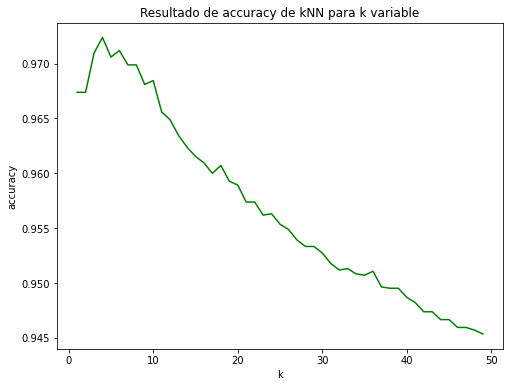

In [5]:
# Graficos Exp1 ACCURACY
df_tiempos_kNN = pd.read_csv("Exp1/resultado_exp1_kNN.csv")

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "k", y = "accuracy", data = df_tiempos_kNN, color = 'green')

gr.set_title("Resultado de accuracy de kNN para k variable")
gr.set_ylabel("accuracy")
gr.set_xlabel("k")

fig = gr.get_figure()
name = "exp1_accuracy"

fig.savefig(f"Exp1/{name}.png")

<Figure size 432x288 with 0 Axes>

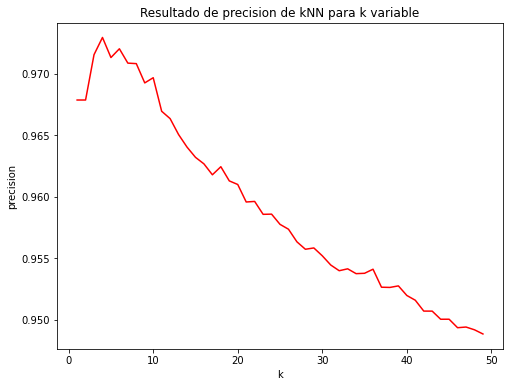

In [6]:
# Graficos Exp1 PRECISION
df_tiempos_kNN = pd.read_csv("Exp1/resultado_exp1_kNN.csv")

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "k", y = "precision", data = df_tiempos_kNN, color = 'red')

gr.set_title("Resultado de precision de kNN para k variable")
gr.set_ylabel("precision")
gr.set_xlabel("k")

fig = gr.get_figure()
name = "exp1_precision"

fig.savefig(f"Exp1/{name}.png")

<Figure size 432x288 with 0 Axes>

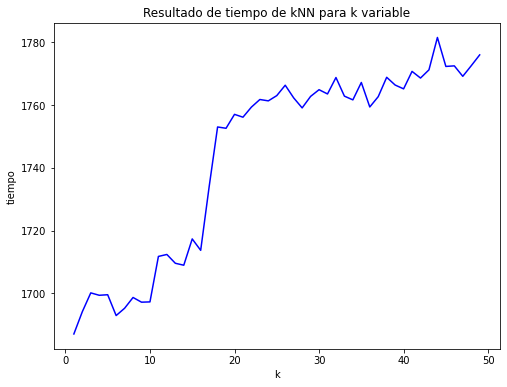

In [7]:
# Graficos Exp1 TIEMPO
df_tiempos_kNN = pd.read_csv("Exp1/resultado_exp1_kNN.csv")

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "k", y = "time", data = df_tiempos_kNN, color = 'blue')

gr.set_title("Resultado de tiempo de kNN para k variable")
gr.set_ylabel("tiempo")
gr.set_xlabel("k")

fig = gr.get_figure()
name = "exp1_tiempo"

fig.savefig(f"Exp1/{name}.png")

# Experimento 2
### Análisis de alpha para PCA y KNN

Para el análisis del alpha, vamos a utilizar el valor de k=4 para Knn, porque en el item anterior determinamos
que se trata de la cantidad de vecinos óptima resultante de la comparación con las métricas utilizadas.

In [8]:
%%time

from sklearn.metrics import accuracy_score, precision_score
from time import time
import numpy as np

# Los alpha que voy a probar están entre 0 y 49
alpha_list = np.arange(1,75)

total_accuracies = []
total_precisions = []
total_pcaTimes = []

for alpha in alpha_list:
    
    # Tomo el tiempo antes de iniciar la ejecución del algoritmo pca
    pcaTime_start = time()
    
    # Ejecuto el algoritmo de pca de metnum.cpp
    # Transformo las instancias de entrenamiento
    pca = metnum.PCA(int(alpha))
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    # Transformo las instancias de validacion
    X_val_transformed = pca.transform(X_val)
    
    # Ejecuto el algoritmo de knn de metnum.cpp, teniendo en cuenta que uso los datos transformados, y k=10
    metNumClassifier = metnum.KNNClassifier(4)
    metNumClassifier.fit(X_train_transformed, y_train)
    y_pred = metNumClassifier.predict(X_val_transformed)
    
    # Tomo el tiempo al finalizar la ejecucion del algoritmo pca + knn
    pcaTime_end = time()
    pcaTime = pcaTime_end - pcaTime_start
    
    # Uso las metricas de sklearn para calcular el accuracy y la precisión
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    
    print(f"Accuracy number {alpha} is {accuracy}")
    print(f"Precision number {alpha} is {precision}")
    print(f"knnTime number {alpha} is {pcaTime}")
    
    # Voy guardando los resultados parciales en las listas correspondientes
    total_pcaTimes.append(pcaTime)
    total_accuracies.append(accuracy)
    total_precisions.append(precision)

print("TERMINADO!")

columnas = ["alpha", "accuracy", "precision", "time"]
join_cols = np.column_stack((alpha_list, total_accuracies, total_precisions, total_pcaTimes))

resultado = pd.DataFrame(join_cols, columns=columnas)
resultado.to_csv(F"Exp2/resultado_exp2_kNN_PCA.csv", index=False, header=True);



Accuracy number 1 is 0.2757142857142857
Precision number 1 is 0.2515128117544459
knnTime number 1 is 19.51641845703125
Accuracy number 2 is 0.4107142857142857
Precision number 2 is 0.3912959208765706
knnTime number 2 is 18.606899976730347
Accuracy number 3 is 0.4766666666666667
Precision number 3 is 0.4610485392606908
knnTime number 3 is 19.39714503288269
Accuracy number 4 is 0.6061904761904762
Precision number 4 is 0.5965184887305985
knnTime number 4 is 19.50981116294861
Accuracy number 5 is 0.7276190476190476
Precision number 5 is 0.7240297027657709
knnTime number 5 is 20.495121002197266
Accuracy number 6 is 0.8166666666666667
Precision number 6 is 0.8155159327659961
knnTime number 6 is 20.614192247390747
Accuracy number 7 is 0.8611904761904762
Precision number 7 is 0.8608266546220555
knnTime number 7 is 21.771260023117065
Accuracy number 8 is 0.8947619047619048
Precision number 8 is 0.8938125708884239
knnTime number 8 is 22.39917516708374
Accuracy number 9 is 0.9107142857142857
Prec

<Figure size 432x288 with 0 Axes>

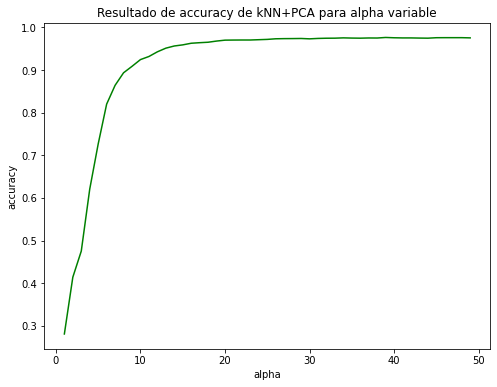

In [8]:
# Graficos Exp2 ACCURACY
df_tiempos_kNN = pd.read_csv("Exp2/resultado_exp2_kNN_PCA.csv")

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "alpha", y = "accuracy", data = df_tiempos_kNN, color = 'green')

gr.set_title("Resultado de accuracy de kNN+PCA para alpha variable")
gr.set_ylabel("accuracy")
gr.set_xlabel("alpha")

fig = gr.get_figure()
name = "exp2_accuracy"

fig.savefig(f"Exp2/{name}.png")

<Figure size 432x288 with 0 Axes>

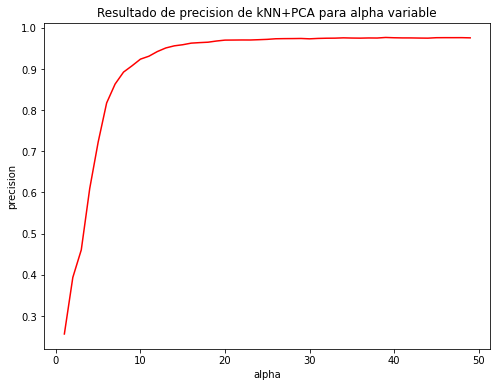

In [9]:
# Graficos Exp2 PRECISION
df_tiempos_kNN = pd.read_csv("Exp2/resultado_exp2_kNN_PCA.csv")

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "alpha", y = "precision", data = df_tiempos_kNN, color = 'red')

gr.set_title("Resultado de precision de kNN+PCA para alpha variable")
gr.set_ylabel("precision")
gr.set_xlabel("alpha")

fig = gr.get_figure()
name = "exp2_precision"

fig.savefig(f"Exp2/{name}.png")

<Figure size 432x288 with 0 Axes>

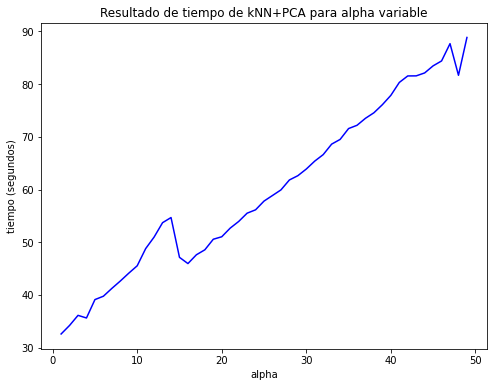

In [10]:
# Graficos Exp2 TIEMPO
df_tiempos_kNN = pd.read_csv("Exp2/resultado_exp2_kNN_PCA.csv")

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "alpha", y = "time", data = df_tiempos_kNN, color = 'blue')

gr.set_title("Resultado de tiempo de kNN+PCA para alpha variable")
gr.set_ylabel("tiempo (segundos)")
gr.set_xlabel("alpha")

fig = gr.get_figure()
name = "exp2_tiempo"

fig.savefig(f"Exp2/{name}.png")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

"""
Para hacer K-Crossfold Validation se divide el conjunto de datos en K subsets y se utilizan K-1 de estos para entrenar y el ultimo como validacion. 

Para obtner una medida estadisticamente mas robusta se hacen K rondas de entrenamiento alternando el subset que se utliza como validacion para luego calcular el promedio de estas metricas.
"""



def run_kfold(k, K, X, y, PCA=False, alpha = 20):
    #Utilizamos la funcion KFold provista por sklearn para segmetnar la data
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    
    list_acurracy = []
    list_precision = []
    list_recall = []
    list_F1 = []

    print(f"Va por el K:{K}")
    
    for train_index, test_index in kfold.split(X):
        # Separamos el conjunto de entrenamiento y el conjunto de test
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        if(PCA):
            # Se tranforman las instancias de entrenamiento a PCA
            pca = metnum.PCA(int(alpha))
            pca.fit(X_train)
            X_train_transformed = pca.transform(X_train)
            # Se transforman las instancias de validacion
            X_val_transformed = pca.transform(X_val)
            # Se ejecuta el algoritmo de knn de metnum.cpp
            metNumClassifier = metnum.KNNClassifier(k)
            metNumClassifier.fit(X_train_transformed, y_train)
            y_pred = metNumClassifier.predict(X_val_transformed)    

        else:
            # Inicializamos un nuevo clasificador cada iteracion.
            metNumClassifier = metnum.KNNClassifier(k)
        
            # Se entrena con los K-1 subsets
            metNumClassifier.fit(X_train, y_train)

            # Se hace la prediccion de la ronda actual
            y_pred = metNumClassifier.predict(X_val)
        
        
        # Se extraen las metricas
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='macro')
        recall = recall_score(y_val, y_pred, average='macro')
        f1Score = f1_score(y_val, y_pred, average='macro')


        list_acurracy.append(accuracy)
        list_precision.append(precision)
        list_recall.append(recall)
        list_F1.append(f1Score)

        #Termina la ronda 

    list_acurracy = np.asarray(list_acurracy)
    list_precision = np.asarray(list_precision)
    list_recall = np.asarray(list_recall)
    list_F1 = np.asarray(list_F1)
    
    meanAcc = np.mean(list_acurracy)
    meanprecision = np.mean(list_precision)
    meanRecall = np.mean(list_recall)
    meanF1 = np.mean(list_F1)
    
    return [meanAcc, meanprecision, meanF1, meanRecall]

# Experimento 3:
### Analisis de K para K-Cross Validation


In [3]:
import metnum

df_train = pd.read_csv("../data/train.csv")

# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((42000, 784), (42000, 1))

#### Primero para KNN solo 


In [8]:
k=4
col_metricas=["K","accuracy","precision","recall","f1_score"]
list_metricas=[]

for K in range(2,21):
    #PCA por defecto esta como falso asi que se ejecuta sol kNN
    results = run_kfold(k, int(K), X, y)

    accuracy = results[0]
    precision = results[1]
    f1Score = results[2]
    recall = results[3]
    
    list_score_aux = []
    list_score_aux.append(K)
    list_score_aux.append(accuracy)
    list_score_aux.append(precision)
    list_score_aux.append(recall)
    list_score_aux.append(f1Score)
    list_metricas.append(list_score_aux)
        

print("TERMINADO!")
resultado_metrics = pd.DataFrame(list_metricas, columns=col_metricas)
resultado_metrics.to_csv(F"Exp3/metrics_exp3_kNN.csv", index=False, header=True);

Va por el K:2
Va por el K:3
Va por el K:4
Va por el K:5
Va por el K:6
Va por el K:7
Va por el K:8
Va por el K:9
Va por el K:10
Va por el K:11
Va por el K:12
Va por el K:13
Va por el K:14
Va por el K:15
Va por el K:16
Va por el K:17
Va por el K:18
Va por el K:19
Va por el K:20
TERMINADO!


In [9]:
k=4
col_metricas=["K","accuracy","precision","recall","f1_score"]
list_metricas=[]

for K in range(2,21):

    results = run_kfold(k, int(K), X, y,PCA=True)

    accuracy = results[0]
    precision = results[1]
    f1Score = results[2]
    recall = results[3]
    
    list_score_aux = []
    list_score_aux.append(K)
    list_score_aux.append(accuracy)
    list_score_aux.append(precision)
    list_score_aux.append(recall)
    list_score_aux.append(f1Score)
    list_metricas.append(list_score_aux)
        
        

print("TERMINADO!")

resultado_metrics = pd.DataFrame(list_metricas, columns=col_metricas)
resultado_metrics.to_csv(F"Exp3/metrics_exp3_kNN-PCA.csv", index=False, header=True);

Va por el K:2
Va por el K:3
Va por el K:4
Va por el K:5
Va por el K:6
Va por el K:7
Va por el K:8
Va por el K:9
Va por el K:10
Va por el K:11
Va por el K:12
Va por el K:13
Va por el K:14
Va por el K:15
Va por el K:16
Va por el K:17
Va por el K:18
Va por el K:19
Va por el K:20
TERMINADO!


## Veamos las metricas

<Figure size 432x288 with 0 Axes>

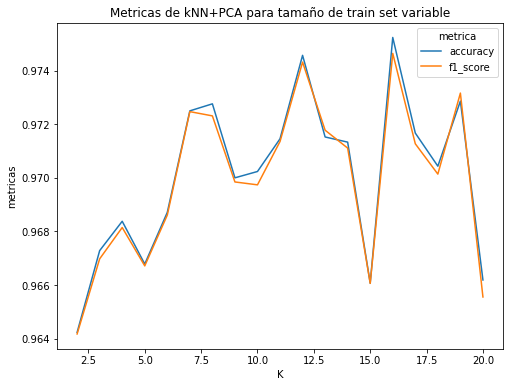

In [6]:
# Metricas kNN
df_metrics = pd.read_csv('Exp3/metrics_exp3_kNN.csv')

col_scores=["accuracy","f1_score"]
df_melt_tiempos = df_metrics.melt(id_vars='K', value_vars=col_scores, var_name='metrica', value_name='values')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "K", y = 'values', data = df_melt_tiempos, hue = "metrica")

gr.set_title("Metricas de kNN+PCA para tamaño de train set variable")
gr.set_ylabel("metricas")
gr.set_xlabel("K")

fig = gr.get_figure()
name = "exp3_metrics_kNN"

fig.savefig(f"Exp3/{name}.png")

<Figure size 432x288 with 0 Axes>

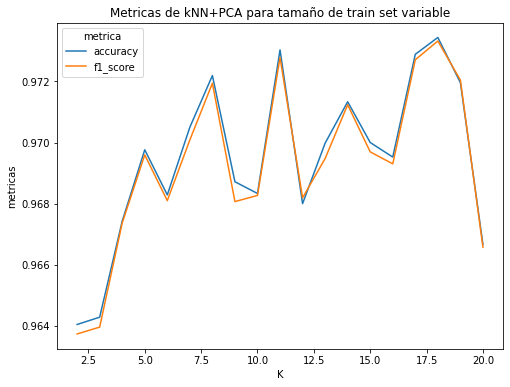

In [7]:
# Metricas kNN+PCA
df_metrics = pd.read_csv('Exp3/metrics_exp3_kNN-PCA.csv')

col_scores=["accuracy","f1_score"]
df_melt_tiempos = df_metrics.melt(id_vars='K', value_vars=col_scores, var_name='metrica', value_name='values')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "K", y = 'values', data = df_melt_tiempos, hue = "metrica")

gr.set_title("Metricas de kNN+PCA para tamaño de train set variable")
gr.set_ylabel("metricas")
gr.set_xlabel("K")

fig = gr.get_figure()
name = "exp3_metrics_kNN-PCA"

fig.savefig(f"Exp3/{name}.png")

# Experimento 4.1:
### Variación del tiempo de computo en relación al conjunto de entrenamiento
# Experimento 4.2:
### Variación de la exactitud de computo en relación al conjunto de entrenamiento


In [20]:
#TEMPORAL EXP 4
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import metnum

df_train = pd.read_csv("../data/train.csv")

# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((42000, 784), (42000, 1))

## Metodo: kNN (con k=4)

In [2]:
%%time
columnas = ["tamaño", "tiempo"]
filas_res = []
k=4
K=10

# Para los scores
col_scores=["tamaño","accuracy","precision","recall","f1_score"]
list_scores=[]

# Variamos el tamaño del conjunto de entrenamiento entre 100 y el total del dataset de MNIST
step = 3000
limit = X.shape[0]
#step = 200
#limit = 4000
iteraciones = 3
for tam_total in range(0,limit+1,step):
    if tam_total == 0: tam_total = 100
    # En base a la cantidad de particiones, calcula el tamaño del train set
    new_shape = int((tam_total*(K-1))/K)
    # Seteo el tamaño del conjunto de train
    X_train, y_train = X[:new_shape], y[:new_shape]
    X_val, y_val = X[new_shape:tam_total], y[new_shape:tam_total]
    print(f"Train set: {len(X_train)} \t Test set:{len(X_val)} \t Total: {tam_total}")
    for i in range(iteraciones):
        # Start time---------------------------------
        ejec_time_start = time()
        # Ejecuto el algoritmo de metnum.cpp
        metNumClassifier = metnum.KNNClassifier(k)
        metNumClassifier.fit(X_train, y_train)
        y_pred = metNumClassifier.predict(X_val)
        # End time-----------------------------------
        ejec_time_end = time()
        ejec_time = ejec_time_end - ejec_time_start
        
        # Guardo el resultado del tiempo y el tamaño en esa iteracion
        fila = []
        fila.append(new_shape)
        fila.append(ejec_time)
        filas_res.append(fila)
    
    #Score calc
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1Score = f1_score(y_val, y_pred, average='macro')
    list_score_aux = []
    list_score_aux.append(new_shape)
    list_score_aux.append(accuracy)
    list_score_aux.append(precision)
    list_score_aux.append(recall)
    list_score_aux.append(f1Score)
    list_scores.append(list_score_aux)

print("TERMINADO!")
resultado = pd.DataFrame(filas_res, columns=columnas)
resultado.to_csv(F"Exp4/Exp4.1/resultado_exp4_kNN.csv", index=False, header=True);

resultado_metrics = pd.DataFrame(list_scores, columns=col_scores)
resultado_metrics.to_csv(F"Exp4/Exp4.2/metrics_exp4_kNN.csv", index=False, header=True);



Train set: 90 	 Test set:10 	 Total: 100
Train set: 2700 	 Test set:300 	 Total: 3000
Train set: 5400 	 Test set:600 	 Total: 6000
Train set: 8100 	 Test set:900 	 Total: 9000
Train set: 10800 	 Test set:1200 	 Total: 12000
Train set: 13500 	 Test set:1500 	 Total: 15000
Train set: 16200 	 Test set:1800 	 Total: 18000
Train set: 18900 	 Test set:2100 	 Total: 21000
Train set: 21600 	 Test set:2400 	 Total: 24000
Train set: 24300 	 Test set:2700 	 Total: 27000
Train set: 27000 	 Test set:3000 	 Total: 30000
Train set: 29700 	 Test set:3300 	 Total: 33000
Train set: 32400 	 Test set:3600 	 Total: 36000
Train set: 35100 	 Test set:3900 	 Total: 39000
Train set: 37800 	 Test set:4200 	 Total: 42000
TERMINADO!
CPU times: user 2h 15min 31s, sys: 2h 2min 29s, total: 4h 18min
Wall time: 4h 16min 51s


## Metodo: kNN + PCA (con k=4 y alpha=20)

In [6]:
%%time
columnas = ["tamaño", "tiempo"]
filas_res = []
k=4
K=10
alpha=20

# Para los scores
col_scores=["tamaño","accuracy","precision","recall","f1_score"]
list_scores=[]

# Variamos el tamaño del conjunto de entrenamiento entre 100 y el total del dataset de MNIST
step = 3000
limit = X.shape[0]
iteraciones = 3
for tam_total in range(0,limit+1,step):
    if tam_total == 0: tam_total = 100
    # En base a la cantidad de particiones, calcula el tamaño del train set
    new_shape = int((tam_total*(K-1))/K)
    # Seteo el tamaño del conjunto de train
    X_train, y_train = X[:new_shape], y[:new_shape]
    X_val, y_val = X[new_shape:tam_total], y[new_shape:tam_total]
    print(f"Train set: {len(X_train)} \t Test set:{len(X_val)} \t Total: {tam_total}")
    for i in range(iteraciones):
        # Start time---------------------------------
        ejec_time_start = time()

        # Ejecuto el algoritmo de pca de metnum.cpp
        # Transformo las instancias de entrenamiento
        pca = metnum.PCA(int(alpha))
        pca.fit(X_train)
        X_train_transformed = pca.transform(X_train)
        # Transformo las instancias de validacion
        X_val_transformed = pca.transform(X_val)
        # Ejecuto el algoritmo de knn de metnum.cpp, teniendo en cuenta que uso los datos transformados
        metNumClassifier = metnum.KNNClassifier(k)
        metNumClassifier.fit(X_train_transformed, y_train)
        y_pred = metNumClassifier.predict(X_val_transformed)

        # End time-----------------------------------
        ejec_time_end = time()
        ejec_time = ejec_time_end - ejec_time_start
        
        # Guardo el resultado del tiempo y el tamaño en esa iteracion
        fila = []
        fila.append(new_shape)
        fila.append(ejec_time)
        filas_res.append(fila)

    #Score calc
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1Score = f1_score(y_val, y_pred, average='macro')
    list_score_aux = []
    list_score_aux.append(new_shape)
    list_score_aux.append(accuracy)
    list_score_aux.append(precision)
    list_score_aux.append(recall)
    list_score_aux.append(f1Score)
    list_scores.append(list_score_aux)

print("TERMINADO!")
resultado = pd.DataFrame(filas_res, columns=columnas)
resultado.to_csv(F"Exp4/Exp4.1/resultado_exp4_kNN-PCA_20.csv", index=False, header=True);

resultado_metrics = pd.DataFrame(list_scores, columns=col_scores)
resultado_metrics.to_csv(F"Exp4/Exp4.2/metrics_exp4_kNN-PCA_20.csv", index=False, header=True);

Train set: 90 	 Test set:10 	 Total: 100
Train set: 180 	 Test set:20 	 Total: 200
Train set: 360 	 Test set:40 	 Total: 400
Train set: 540 	 Test set:60 	 Total: 600
Train set: 720 	 Test set:80 	 Total: 800
Train set: 900 	 Test set:100 	 Total: 1000
Train set: 1080 	 Test set:120 	 Total: 1200
Train set: 1260 	 Test set:140 	 Total: 1400
Train set: 1440 	 Test set:160 	 Total: 1600
Train set: 1620 	 Test set:180 	 Total: 1800
Train set: 1800 	 Test set:200 	 Total: 2000
Train set: 1980 	 Test set:220 	 Total: 2200
Train set: 2160 	 Test set:240 	 Total: 2400
Train set: 2340 	 Test set:260 	 Total: 2600
Train set: 2520 	 Test set:280 	 Total: 2800
Train set: 2700 	 Test set:300 	 Total: 3000
TERMINADO!
CPU times: user 43.7 s, sys: 109 ms, total: 43.8 s
Wall time: 43.7 s


# Experimento 4.1: (Analisis)

<Figure size 432x288 with 0 Axes>

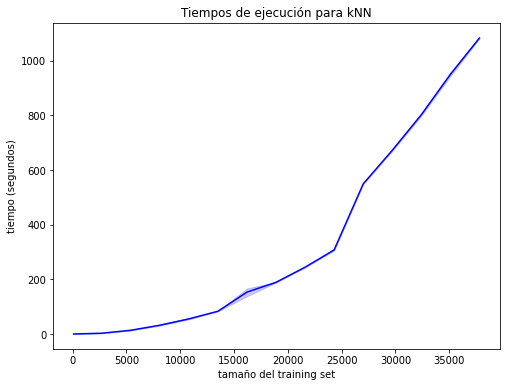

In [28]:
df_tiempos_kNN = pd.read_csv('Exp4/Exp4.1/resultado_exp4_kNN.csv')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "tamaño", y = 'tiempo', data = df_tiempos_kNN, color = 'blue')

gr.set_title("Tiempos de ejecución para kNN")
gr.set_ylabel("tiempo (segundos)")
gr.set_xlabel("tamaño del training set")

fig = gr.get_figure()
name = "exp4_tiempos_kNN"

fig.savefig(f"Exp4/Exp4.1/{name}.png")

<Figure size 432x288 with 0 Axes>

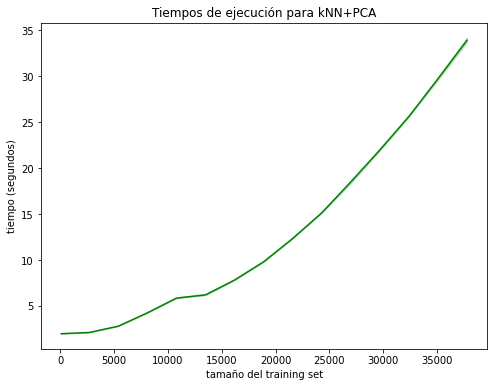

In [36]:
df_tiempos_kNN_PCA = pd.read_csv('Exp4/Exp4.1/resultado_exp4_kNN-PCA.csv')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "tamaño", y = 'tiempo', data = df_tiempos_kNN_PCA, color='green')

gr.set_title("Tiempos de ejecución para kNN+PCA")
gr.set_ylabel("tiempo (segundos)")
gr.set_xlabel("tamaño del training set")

fig = gr.get_figure()
name = "exp4_tiempos_kNN-PCA"

fig.savefig(f"Exp4/Exp4.1/{name}.png")


###  Comparacion en tiempo kNN vs kNN+PCA

In [37]:
#Como los tiempos ya fueron calculados en el experimento 4
#Solo se tiene que hacer el analisis de los datos de kNN vs kNN+PCA

# Levanto los csv del exp4
df_tiempos_kNN = pd.read_csv('Exp4/Exp4.1/resultado_exp4_kNN.csv')
df_tiempos_kNN_PCA = pd.read_csv('Exp4/Exp4.1/resultado_exp4_kNN-PCA.csv')

# Agrego una nueva columna en el dataframe de kNN con el nombre del metodo
df_tiempos_kNN.insert(0, "metodo", "kNN")
#Agrego una nueva columna en el dataframe de kNN con el nombre del metodo
df_tiempos_kNN_PCA.insert(0, "metodo", "PCA")

# Uno los dataframes
list_dfs = [df_tiempos_kNN, df_tiempos_kNN_PCA]
df_tiempos = pd.concat(list_dfs, axis=0, ignore_index=True)


<Figure size 432x288 with 0 Axes>

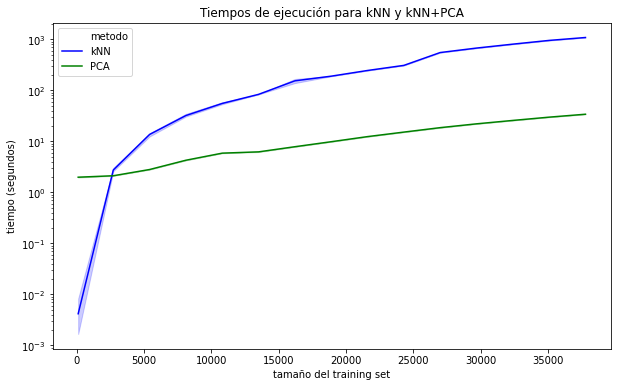

In [38]:
plt.figure()
plt.figure(figsize=(10,6))
gr = sns.lineplot(x = "tamaño", y = 'tiempo', data = df_tiempos, hue = "metodo", palette=["blue","green"])
#palette = sns.color_palette(["#4c72b0","#4c72b0","#55a868","#55a868","#c44e52","#c44e52"])
gr.set_title("Tiempos de ejecución para kNN y kNN+PCA")
gr.set_ylabel("tiempo (segundos)") 
gr.set_xlabel("tamaño del training set")
gr.set_yscale("log")

fig = gr.get_figure()
name = "exp4_tiempos_comp"

fig.savefig(f"Exp4/Exp4.1/{name}.png")

# Experimento 4.2: (Analisis)

<Figure size 432x288 with 0 Axes>

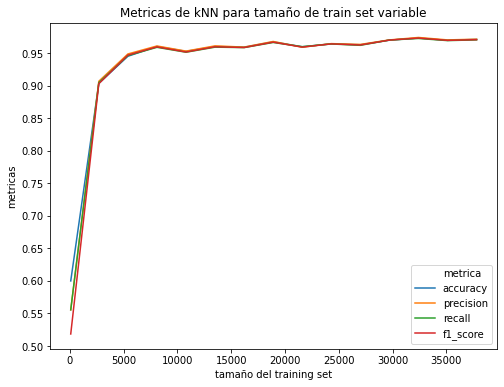

In [32]:
# Metricas kNN
df_metrics = pd.read_csv('Exp4/Exp4.2/metrics_exp4_kNN.csv')

col_scores=["accuracy","precision","recall","f1_score"]
df_melt_tiempos = df_metrics.melt(id_vars='tamaño', value_vars=col_scores, var_name='metrica', value_name='values')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "tamaño", y = 'values', data = df_melt_tiempos, hue = "metrica")

gr.set_title("Metricas de kNN para tamaño de train set variable")
gr.set_ylabel("metricas")
gr.set_xlabel("tamaño del training set")
gr.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

fig = gr.get_figure()
name = "exp4_metrics_kNN"

fig.savefig(f"Exp4/Exp4.2/{name}.png")

<Figure size 432x288 with 0 Axes>

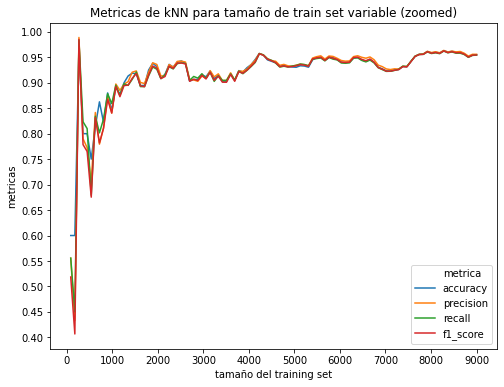

In [33]:
# Metricas kNN+PCA (zoomed)
df_metrics = pd.read_csv('Exp4/Exp4.2/metrics_exp4_kNN_reduced.csv')

col_scores=["accuracy","precision","recall","f1_score"]
df_melt_tiempos = df_metrics.melt(id_vars='tamaño', value_vars=col_scores, var_name='metrica', value_name='values')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "tamaño", y = 'values', data = df_melt_tiempos, hue = "metrica")

gr.set_title("Metricas de kNN para tamaño de train set variable (zoomed)")
gr.set_ylabel("metricas")
gr.set_xlabel("tamaño del training set")
gr.xaxis.set_major_locator(ticker.MultipleLocator(1000))
gr.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

fig = gr.get_figure()
name = "exp4_metrics_kNN_zoomed"

fig.savefig(f"Exp4/Exp4.2/{name}.png")

<Figure size 432x288 with 0 Axes>

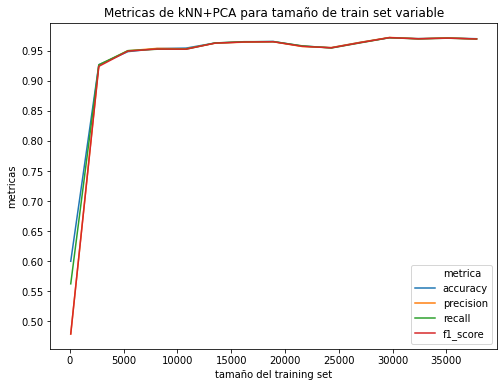

In [34]:
# Metricas kNN+PCA
df_metrics = pd.read_csv('Exp4/Exp4.2/metrics_exp4_kNN-PCA.csv')

col_scores=["accuracy","precision","recall","f1_score"]
df_melt_tiempos = df_metrics.melt(id_vars='tamaño', value_vars=col_scores, var_name='metrica', value_name='values')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "tamaño", y = 'values', data = df_melt_tiempos, hue = "metrica")

gr.set_title("Metricas de kNN+PCA para tamaño de train set variable")
gr.set_ylabel("metricas")
gr.set_xlabel("tamaño del training set")
gr.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

fig = gr.get_figure()
name = "exp4_metrics_kNN-PCA"

fig.savefig(f"Exp4/Exp4.2/{name}.png")

<Figure size 432x288 with 0 Axes>

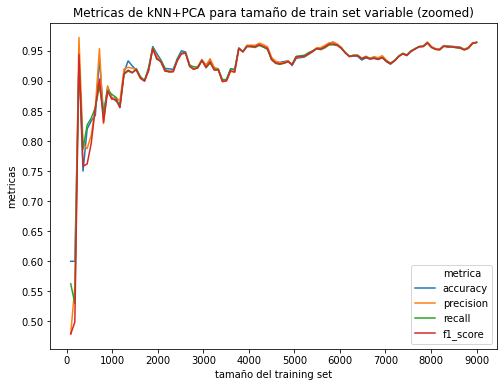

In [35]:
# Metricas kNN+PCA (zoomed)
df_metrics = pd.read_csv('Exp4/Exp4.2/metrics_exp4_kNN-PCA_reduced.csv')

col_scores=["accuracy","precision","recall","f1_score"]
df_melt_tiempos = df_metrics.melt(id_vars='tamaño', value_vars=col_scores, var_name='metrica', value_name='values')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "tamaño", y = 'values', data = df_melt_tiempos, hue = "metrica")

gr.set_title("Metricas de kNN+PCA para tamaño de train set variable (zoomed)")
gr.set_ylabel("metricas")
gr.set_xlabel("tamaño del training set")
gr.xaxis.set_major_locator(ticker.MultipleLocator(1000))
gr.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

fig = gr.get_figure()
name = "exp4_metrics_kNN_PCA_zoomed"

fig.savefig(f"Exp4/Exp4.2/{name}.png")

# Experimento 5
### Kaggle

In [1]:
from time import time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
import metnum

df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X_test = df_test[df_test.columns[:]].values

X.shape, y.shape, X_test.shape

((42000, 784), (42000, 1), (28000, 784))

### kNN (k=4)

In [39]:
%%time

k=4
# Ejecuto el algoritmo de metnum.cpp
metNumClassifier = metnum.KNNClassifier(k)
metNumClassifier.fit(X, y)
y_pred = metNumClassifier.predict(X_test)

print("Terminado!")

# Creo el arreglo con la forma que pide Kaggle
cols = ["ImageId","Label"]
images_id = np.asarray([x for x in range(1,y_pred.shape[0]+1)])
join = np.column_stack((images_id, y_pred))

resultado = pd.DataFrame(join.astype(int), columns=cols)
resultado.to_csv(F"Exp5/submission_kNN.csv", index=False, header=True)

Terminado!
CPU times: user 12.1 s, sys: 43.8 ms, total: 12.1 s
Wall time: 12 s


### kNN + PCA (k=4) (alpha=20)

In [3]:
%%time
k=4
alpha = 20
# Ejecuto el algoritmo de pca de metnum.cpp
# Transformo las instancias de entrenamiento
pca = metnum.PCA(int(alpha))
pca.fit(X)
X_transformed = pca.transform(X)
# Transformo las instancias de validacion
X_test_transformed = pca.transform(X_test)
# Ejecuto el algoritmo de knn de metnum.cpp, teniendo en cuenta que uso los datos transformados
metNumClassifier = metnum.KNNClassifier(k)
metNumClassifier.fit(X_transformed, y)
y_pred = metNumClassifier.predict(X_test_transformed)

print("Terminado!")

# Creo el arreglo con la forma que pide Kaggle
cols = ["ImageId","Label"]
images_id = np.asarray([x for x in range(1,y_pred.shape[0]+1)])
join = np.column_stack((images_id, y_pred))

resultado = pd.DataFrame(join.astype(int), columns=cols)
resultado.to_csv(F"Exp5/submission_pca.csv", index=False, header=True)

Terminado!
CPU times: user 5min 7s, sys: 1.21 s, total: 5min 8s
Wall time: 5min 7s
